In [ ]:
import pandas as pd
import pymysql
from sqlalchemy import create_engine
from dotenv import load_dotenv

load_dotenv()

db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = "127.0.0.1"
db_name = "data_science"

engine = create_engine("mysql+pymysql://" + db_user + ":" + db_password + "@" + db_host + "/" + db_name)

In [28]:
query = "SELECT * FROM dog_license_2017_data;"
df_licenses = pd.read_sql(query, engine)
print(df_licenses.head())

                                      LicenseType         Breed  \
0                    Dog Individual Spayed Female  BICHON FRISE   
1  Dog Senior Citizen or Disability Spayed Female     CHIHUAHUA   
2                    Dog Individual Spayed Female       LAB MIX   
3                             Dog Individual Male     DACHSHUND   
4                    Dog Individual Spayed Female     DACHSHUND   

               Color  DogName  OwnerZip  ExpYear        ValidDate  
0              WHITE    CHLOE     15090     2017  12/15/2016 9:58  
1  WHITE/BLACK/BROWN  CHALUPA     15120     2017  3/23/2017 14:32  
2             YELLOW      MIA     15133     2017  2/28/2017 10:59  
3   BLACK/BROWN/GREY     CODY     15108     2017   2/9/2017 13:40  
4              BLACK   SOPHIE     15108     2017   2/9/2017 13:40  


In [29]:
df_licenses.describe()

,OwnerZip,ExpYear
count,21727.000000,21727.0
mean,15152.795968,2017.0
std,85.874782,0.0
min,15003.000000,2017.0
25%,15102.000000,2017.0
50%,15137.000000,2017.0
75%,15227.000000,2017.0
max,16229.000000,2017.0


In [30]:
df_licenses.dropna(inplace=True)
df_licenses.describe()

,OwnerZip,ExpYear
count,21527.000000,21527.0
mean,15152.746597,2017.0
std,85.975201,0.0
min,15003.000000,2017.0
25%,15102.000000,2017.0
50%,15137.000000,2017.0
75%,15227.000000,2017.0
max,16229.000000,2017.0


In [31]:
df_licenses["Breed"]

0              BICHON FRISE
1                 CHIHUAHUA
2                   LAB MIX
3                 DACHSHUND
4                 DACHSHUND
                ...        
21722                 BOXER
21723                 MIXED
21724    LABRADOR RETRIEVER
21725          GER SHEPHERD
21726             CHIHUAHUA
Name: Breed, Length: 21527, dtype: object

In [45]:
breeds = df_licenses["Breed"].unique()
breeds.size

265

In [47]:
breed_counts = df_licenses["Breed"].value_counts()
print(breed_counts)

Breed
MIXED                 2287
LABRADOR RETRIEVER    1366
LAB MIX               1181
GER SHEPHERD           742
GOLDEN RETRIEVER       689
                      ... 
PYRENEAN MASTIFF         1
BERGAMASCO               1
PUMI                     1
CAROLINA DOG             1
JINDO                    1
Name: count, Length: 265, dtype: int64


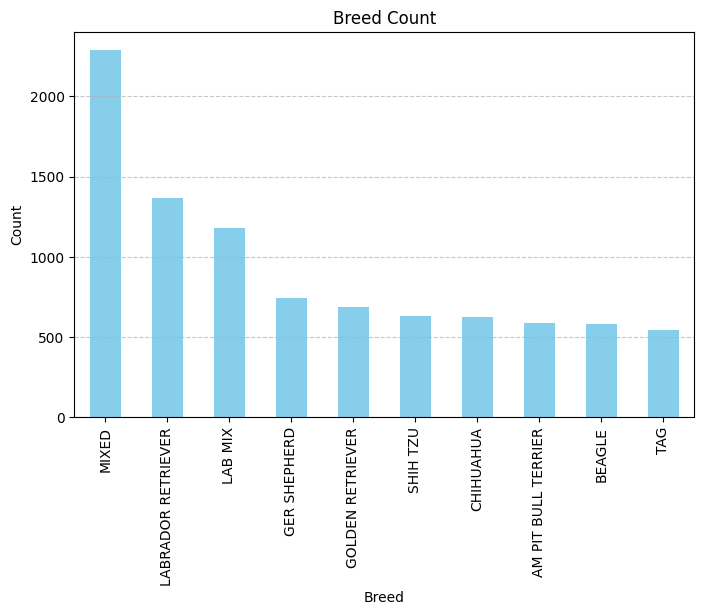

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_ten = breed_counts.head(10)
top_ten.plot(kind="bar", color="skyblue")

plt.title("Breed Count")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [53]:
top_ten

Breed
MIXED                  2287
LABRADOR RETRIEVER     1366
LAB MIX                1181
GER SHEPHERD            742
GOLDEN RETRIEVER        689
SHIH TZU                632
CHIHUAHUA               624
AM PIT BULL TERRIER     586
BEAGLE                  578
TAG                     544
Name: count, dtype: int64

In [55]:
df_licenses["Sex"] = df_licenses["LicenseType"].apply(lambda x: "M" if "Male" in x else "F")
df_licenses.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate,Sex
0,Dog Individual Spayed Female,BICHON FRISE,WHITE,CHLOE,15090,2017,12/15/2016 9:58,F
1,Dog Senior Citizen or Disability Spayed Female,CHIHUAHUA,WHITE/BLACK/BROWN,CHALUPA,15120,2017,3/23/2017 14:32,F
2,Dog Individual Spayed Female,LAB MIX,YELLOW,MIA,15133,2017,2/28/2017 10:59,F
3,Dog Individual Male,DACHSHUND,BLACK/BROWN/GREY,CODY,15108,2017,2/9/2017 13:40,M
4,Dog Individual Spayed Female,DACHSHUND,BLACK,SOPHIE,15108,2017,2/9/2017 13:40,F


In [81]:
breed_sex_counts = df_licenses.groupby(["Breed", "Sex"]).size().unstack(fill_value=0)
breed_sex_counts["Sum"] = breed_sex_counts["M"] + breed_sex_counts["F"]
print(breed_sex_counts.sort_values("Sum", ascending=False))

breed_sex_counts.head()

Sex                    F     M   Sum
Breed                               
MIXED               1197  1090  2287
LABRADOR RETRIEVER   695   671  1366
LAB MIX              598   583  1181
GER SHEPHERD         365   377   742
GOLDEN RETRIEVER     331   358   689
...                  ...   ...   ...
BLACK FOREST HOUND     1     0     1
BERGAMASCO             0     1     1
BELG SHEPHERD          0     1     1
BEAGLE HARRIER         0     1     1
SUSSEX SPANIEL         0     1     1

[265 rows x 3 columns]


Sex,F,M,Sum
Breed,,,
.,9,9,18
AFFENPINSCHER,2,2,4
AIREDALE TERRIER,17,19,36
AKITA,19,13,32
AKITA MIX,5,4,9


In [83]:
breed_sex_sorted = breed_sex_counts.sort_values("Sum", ascending=False)
#breed_sex_sorted.head()
breed_sex_sorted = breed_sex_sorted.drop(columns=["Sum"])
breed_sex_sorted.head()

Sex,F,M
Breed,,
MIXED,1197,1090
LABRADOR RETRIEVER,695,671
LAB MIX,598,583
GER SHEPHERD,365,377
GOLDEN RETRIEVER,331,358


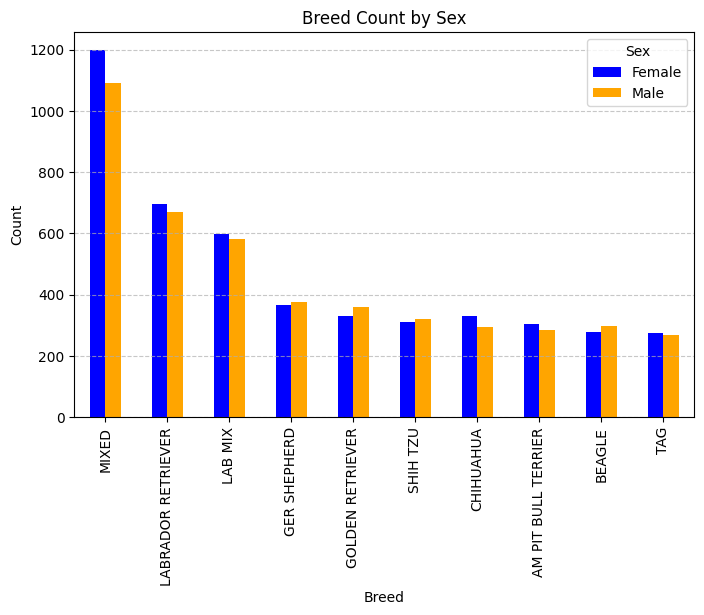

In [84]:

breed_sex_sorted.head(10).plot(kind="bar", figsize=(8,5), color=["blue", "orange"])

plt.title("Breed Count by Sex")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Sex", labels=["Female", "Male"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [87]:
df_licenses["LicenseType"].value_counts()

LicenseType
Dog Individual Spayed Female                      6378
Dog Individual Neutered Male                      6197
Dog Senior Citizen or Disability Spayed Female    2515
Dog Senior Citizen or Disability Neutered Male    2130
Dog Individual Male                               1915
Dog Individual Female                             1272
Dog Senior Citizen or Disability Male              564
Dog Senior Citizen or Disability Female            450
Dog Individual License Duplicate                    34
Dog Individual License - FREE                       33
Dog Senior Citizen or Disability Duplicate          21
Dog Senior Citizen or Disability - FREE              8
Dog Inter County Transfer - Senior                   4
Dog Inter County Transfer                            4
Dog Lifetime Female                                  1
Dog Lifetime Spayed Female                           1
Name: count, dtype: int64